# Black Friday Price Prediction

## Problem Definition:

The challenge is to predict purchase prices of various products purchased by customers based on historical purchase patterns. The data contained features like age, gender, marital status, categories of products purchased, city demographics etc.


In [1]:
# Common Imports
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.random as rnd
import warnings
%matplotlib inline

# setting style
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

# to make this notebook's output stable across runs
rnd.seed(42)

# To plot pretty figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Part I. Data Ingestion

#### Settting Working Directories

In [5]:
import os
# working directory
project_directory=os.getcwd()

# data directory
data_directory=os.path.join(project_directory,"Data")
graph_directory=os.path.join(project_directory,"graph")

# create directory for graphs
#os.makedirs(graph_directory)

# save the figues
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(project_directory, "images", graph_directory, fig_id + ".png")
    print("Saving graph", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

#### Setting Dataset Paths

In [6]:
# dataset
dataset_url = "https://github.com/smileykaur/SalesPrediction/blob/master/"
train = "train.zip"
test = "test.zip"

#### Extracting Data from URL

In [7]:
import zipfile
from six.moves import urllib

# data extraction
def fetch_data(data_path=data_directory, Type=train):
    if not os.path.exists(data_directory):
        os.makedirs(data_directory)
    tgz_path = os.path.join(data_directory,Type)    
    data_url = dataset_url + Type
    #print(data_url, tgz_path)
    urllib.request.urlretrieve(data_url, tgz_path)
    data_tgz = zipfile.ZipFile(tgz_path,'r')
    data_tgz.extractall(path=data_path)
    data_tgz.close()

In [31]:
# fetch train data 
#fetch_data(train)
df_train=pd.read_csv(data_directory+"/"+train)
# fetch test data
#fetch_data(test)
df_test=pd.read_csv(data_directory+"/"+test)

#### Extracting Data

In [9]:
def load_housing_data(data_path=data_directory, Type=train):
    csv_path = os.path.join(data_path, Type)
    return pd.read_csv(csv_path)

#### Training Data

In [10]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Test Data

In [11]:
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [12]:
df_train.shape, df_test.shape

((550068, 12), (233599, 11))

#### Knowing Data Columns

['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase'] 

#### Understanding Data Type

In [18]:
# get information about columns in the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Data Category:
- **float64(1)**
- **int64(9)**
- **object(4)**

#### Finding Statistical Information

In [19]:
# get statistical information about data in the columns
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Understanding Test Data

In [13]:
# get information about columns in the dataframe
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [14]:
# get statistical information about data in the columns
df_test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


## Part II. Data Wrangling

#### Checking Unique data points

In [15]:
# checking unique values and categories
df_train.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

This shows there are **5891** customers and purchase of **3631** products. There are 3 types of city and 21 types of occupation, but no information about how they differ. There are 20 different types of product, and 3631 different products. There are 5 different catergories in the stay in current city column. Let's take a closer look at the individual columns.

### A. Data Analysis 

#### Categorizing "Stay_In_Current_City_Years"

In [16]:
def rep_stay_in_city(val):
    # I'll convert the data to numeric and treat 4+ as 4. 
    replace_dict = {'0':0,'1':1,'2':2,'3':3,'4+':4}
    return replace_dict[val]

#### Categorizing "Age"

In [18]:
def rep_age(val):
    # I'll convert the age category
    replace_dict = {'0-17':14,'18-25':21,'26-35':30,'36-45':40,'46-50':48,'51-55':53, '55+':60}
    return replace_dict[val]

#### Average purchase by profession group

In [17]:
# I explore average purchase by occupation. 
# The results below show that Occupation category 17, 12, 15 are top three spender
occupation_group = df_train.pivot_table(values=["Purchase"], index=["Occupation"],aggfunc=np.mean)
occupation_group.sort_values(by='Purchase', ascending=0)

,Purchase
Occupation,
17,9821.478236
12,9796.640239
15,9778.891163
8,9532.592497
14,9500.702772
7,9425.728223
16,9394.464349
5,9333.149298
13,9306.351061


#### Categorizing Cities

In [19]:
df_train["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [20]:
# categorizing sale according to city
df_train.pivot_table(values='Purchase', index='City_Category', aggfunc=np.mean)

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


A and C are the lowest and highest spending cities respectively.

In [21]:
def data_analysis(data=df_train):    
    # Stay in current city
    data['Stay_In_Current_City_Years']= data['Stay_In_Current_City_Years'].apply(rep_stay_in_city)
    
    # Age Categories    
    data['Age']=data['Age'].apply(rep_age)

    # Converting Occupation to String - To be used as feature later
    data.Occupation = data.Occupation.astype(str)

### B. Missing Values - NaN, Empty 

#### Checking for columns with NaN values

In [22]:
# checking for NaN values
df_train.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

##### Imputing "Product_Category_2" & "Product_Category_3"

In [24]:
import math
def impute_missing_values(data=df_train, features=features_2_impute):
    # Fill mean as there are not many outliers in this category
    # ref: https://stats.stackexchange.com/questions/143700/which-is-better-replacement-by-mean-and-replacement-by-median
    for f in features:
        data[f].fillna(math.ceil(data[f].mean()), inplace=True)
    return data

### C. Creating New Features

In [26]:
def new_features(data=df_train):
    # Number of times a user made a purchase.
    data['User_Count'] = data.groupby('User_ID').User_ID.transform('count')
    # Number of times a product is purchased.
    data['Product_Count'] = data.groupby('Product_ID').Product_ID.transform('count')

### Kicking Data Cleaning

In [32]:
def data_cleaning(data=df_train):
    # perform data cleaning
    data_analysis(data)
    # perform imputation of missing values
    impute_missing_values(data)
    # create new fatures for data
    new_features(data)

# Features to impute
features_2_impute=["Product_Category_2","Product_Category_3"]

# Training Data
data_cleaning(df_train)
# Test Data
data_cleaning(df_test)

In [33]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count
0,1000001,P00069042,F,14,10,A,2,0,3,10.0,13.0,8370,35,227
1,1000001,P00248942,F,14,10,A,2,0,1,6.0,14.0,15200,35,581
2,1000001,P00087842,F,14,10,A,2,0,12,10.0,13.0,1422,35,102
3,1000001,P00085442,F,14,10,A,2,0,12,14.0,13.0,1057,35,341
4,1000002,P00285442,M,60,16,C,4,0,8,10.0,13.0,7969,77,203


In [34]:
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,User_Count,Product_Count
0,1000004,P00128942,M,48,7,B,2,1,1,11.0,13.0,1,397
1,1000009,P00113442,M,30,17,C,0,0,3,5.0,13.0,27,117
2,1000010,P00288442,F,40,1,B,4,1,5,14.0,13.0,101,75
3,1000010,P00145342,F,40,1,B,4,1,4,9.0,13.0,101,8
4,1000011,P00053842,F,30,1,C,1,0,4,5.0,12.0,40,214


In [37]:
# validate if any NaN
df_train.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
User_Count                    False
Product_Count                 False
dtype: bool

### Splitting Data into X-Value(Features) and Y-value(Results)

Objective is to separate values to predict from the values to learn how to predict. Our task is to predict sale price **Purchase Price** of items.

In [39]:
#make a copy of data - 
df_train_copy=df_train
df_test_copy=df_test

In [40]:
# Taking a random saple for ease of visualization and testing
sample = df_train_copy.sample(frac=0.001, replace=True)
sample.shape

(550, 14)

In [41]:
# Purchase Price Data
df_train_purchase = df_train["Purchase"]
# Feature Matrix
df_train = df_train.drop("Purchase", axis=1)

In [42]:
df_train_purchase.shape, df_train.shape

((550068,), (550068, 13))

## Part III. Data Exploration
ref: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

Basic Objectives - 
- Variable Identification 
- Univariate
- Bivariate Analysis
- Missing Values Imputation
- Outliers Treatment
Detecting outliers by using various visualization methods, like Box-plot, Histogram, Scatter Plot.

Removing outliers by various techniques such as deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods.

### A. Univariate Analysis

In this section I explore variables one by one. Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous

**Categorical Data:**
- Marital_Status
- Stay in current City
- Product_Category_1
- Product_Category_2
- Product_Category_3

**Continuous Data**
- Age
- Purchase
- User_Count
- Product_Count

Saving graph attribute_histogram_plots


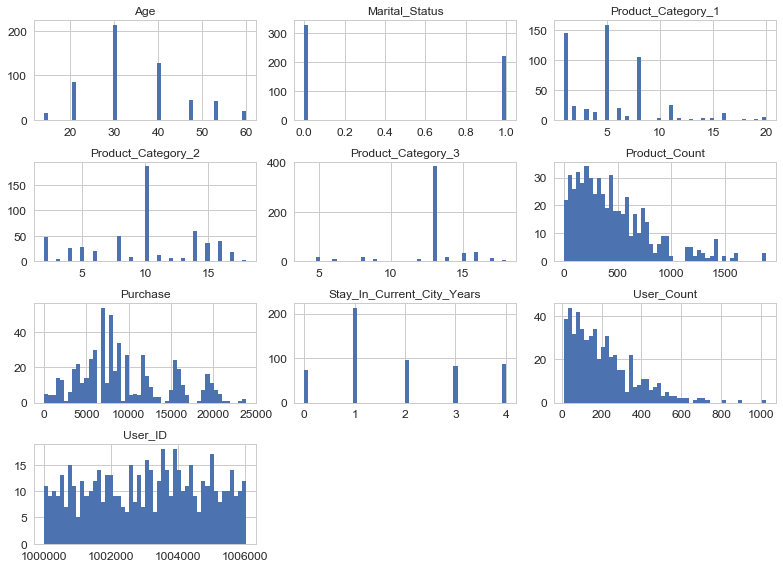

In [43]:
sample.hist(bins=50, figsize=(11,8))
save_fig("attribute_histogram_plots")
plt.show()

[<matplotlib.text.Text at 0x121e79748>, <matplotlib.text.Text at 0x121d484a8>]

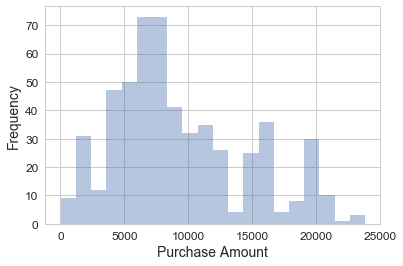

In [44]:
# Distribution plot - Purchase
ax = sns.distplot(sample.Purchase, kde=False, bins=20)
ax.set(xlabel='Purchase Amount', ylabel='Frequency')

[<matplotlib.text.Text at 0x126ef7518>, <matplotlib.text.Text at 0x125a28b70>]

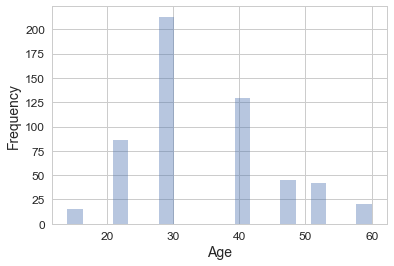

In [45]:
# Distribution plot - Age
ax = sns.distplot(sample.Age, kde=False, bins=20)
ax.set(xlabel='Age', ylabel='Frequency')

### B. Features Correlation

In [46]:
# creating correlation matrix
corr_matrix = sample.corr()
corr_matrix

,User_ID,Age,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Count,Product_Count
User_ID,1.000000,0.005078,-0.025160,0.036475,0.003335,0.010496,0.002664,0.003720,-0.110644,-0.066912
Age,0.005078,1.000000,-0.055103,0.320566,-0.011864,0.044047,0.093315,0.030671,-0.067813,0.043425
Stay_In_Current_City_Years,-0.025160,-0.055103,1.000000,-0.043652,0.009265,0.027593,0.011098,-0.014251,-0.010577,-0.000077
Marital_Status,0.036475,0.320566,-0.043652,1.000000,-0.062750,0.028012,-0.003160,0.025189,-0.017863,0.014154
Product_Category_1,0.003335,-0.011864,0.009265,-0.062750,1.000000,0.318049,0.100979,-0.336184,0.017624,-0.200383
Product_Category_2,0.010496,0.044047,0.027593,0.028012,0.318049,1.000000,0.308533,-0.132507,-0.010189,-0.123751
Product_Category_3,0.002664,0.093315,0.011098,-0.003160,0.100979,0.308533,1.000000,-0.111452,-0.063682,-0.053117
Purchase,0.003720,0.030671,-0.014251,0.025189,-0.336184,-0.132507,-0.111452,1.000000,-0.085340,0.254687
User_Count,-0.110644,-0.067813,-0.010577,-0.017863,0.017624,-0.010189,-0.063682,-0.085340,1.000000,-0.223153
Product_Count,-0.066912,0.043425,-0.000077,0.014154,-0.200383,-0.123751,-0.053117,0.254687,-0.223153,1.000000


In [47]:
# ordering the features based on correlation values
corr_matrix["Purchase"].sort_values(ascending=False)

Purchase                      1.000000
Product_Count                 0.254687
Age                           0.030671
Marital_Status                0.025189
User_ID                       0.003720
Stay_In_Current_City_Years   -0.014251
User_Count                   -0.085340
Product_Category_3           -0.111452
Product_Category_2           -0.132507
Product_Category_1           -0.336184
Name: Purchase, dtype: float64

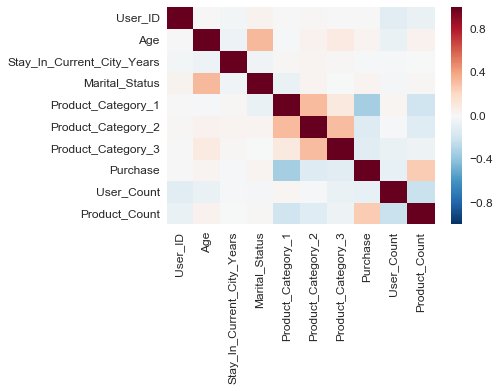

In [48]:
# generating a heat map for correlation matrix
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns.values, yticklabels=corr_matrix.columns.values)

### C. Multivariate Analysis

In [49]:
# taking very small sample for pair plot as it is computationally complex
sample_micro = df_train_copy.sample(frac=0.0001, replace=True)

Saving graph Pair Plot - Multivariate


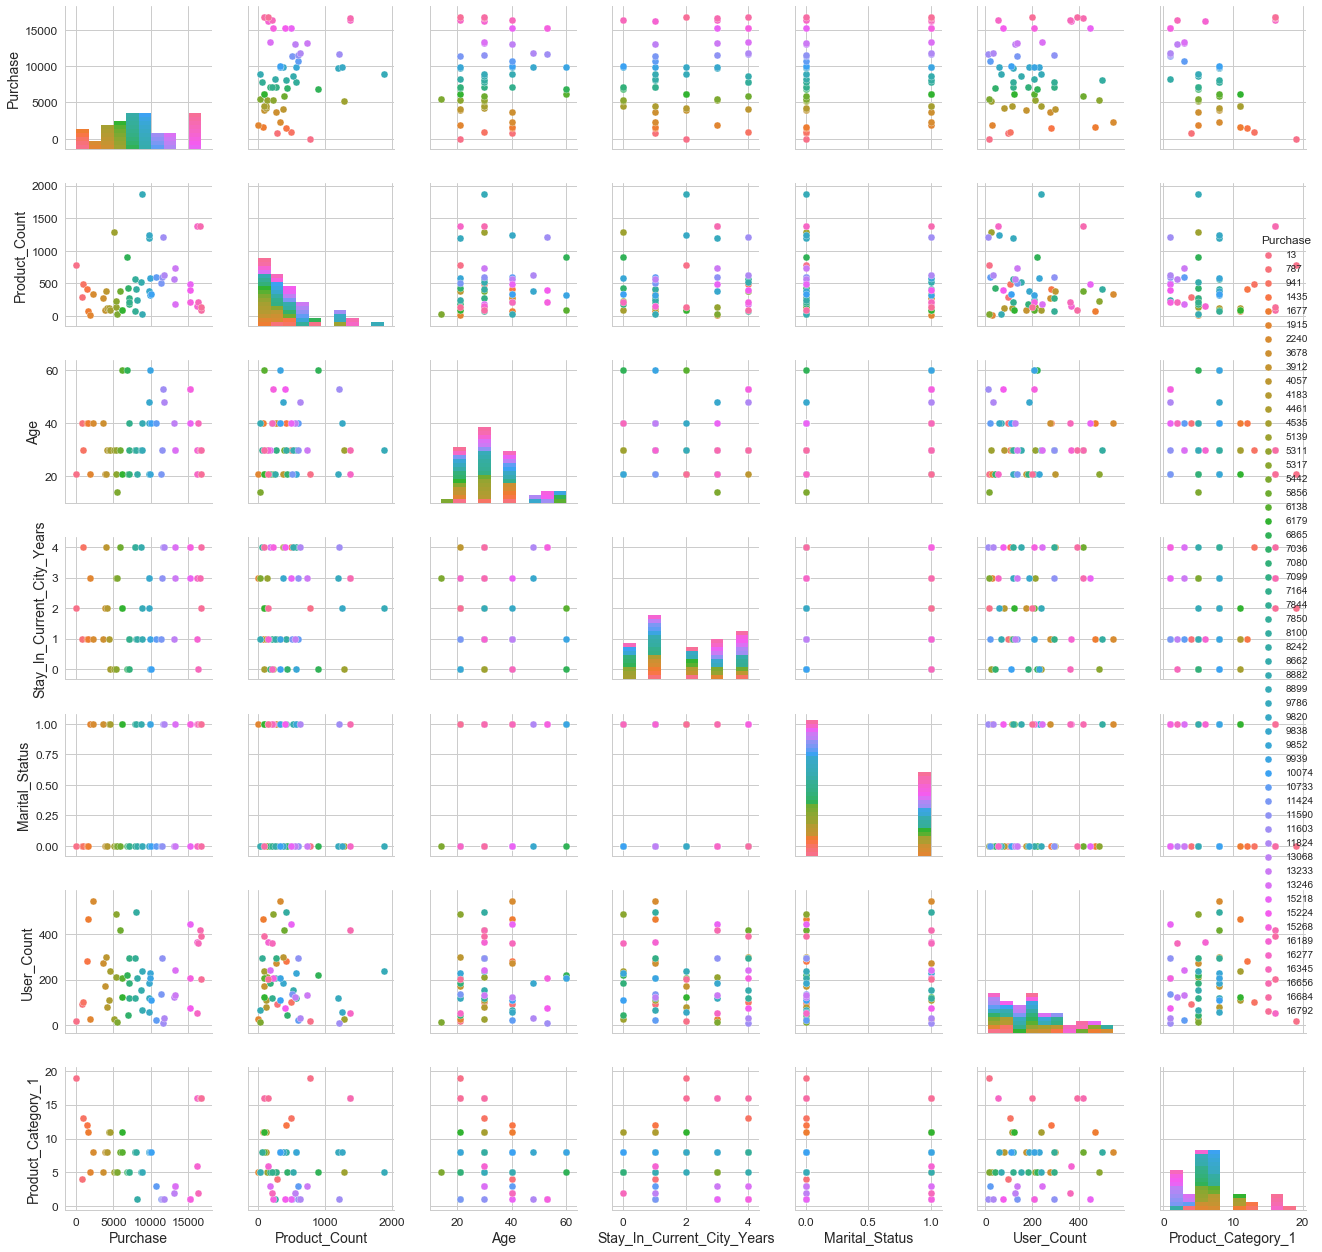

In [50]:
attributes = ["Purchase", "Product_Count", "Age", "Stay_In_Current_City_Years","Marital_Status","User_Count","Product_Category_1"]
sns.pairplot(sample_micro[attributes], hue='Purchase', size=2.5);
save_fig("Pair Plot - Multivariate")
plt.show()

From the pairplot above it is evident that there is **no strong correlation** between any two features. 

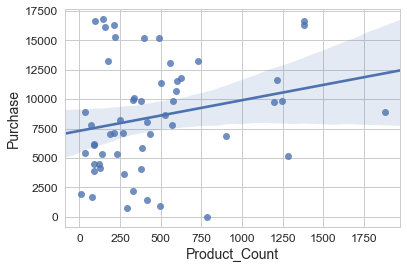

In [51]:
# Bar Plot
sns.regplot(x="Product_Count", y="Purchase", data=sample_micro)
plt.show()

#### Categorical Data

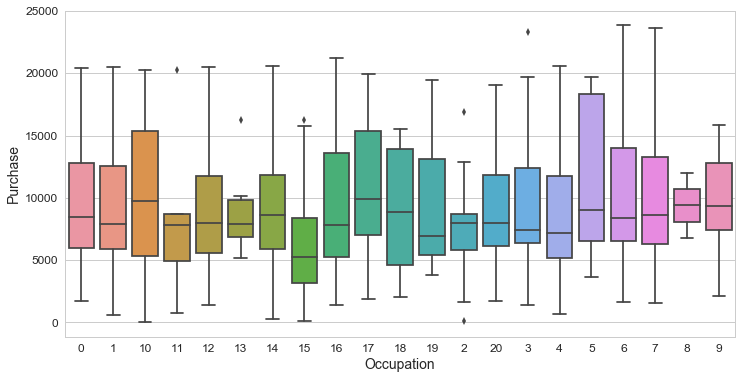

In [52]:
# Box Plot - Different Job Categories 
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Occupation', y = 'Purchase',  data = sample)

# Interesting Results - 
# Job category 5 make expensive purchase
# Job category 16,17,18 make wide range expense purchase

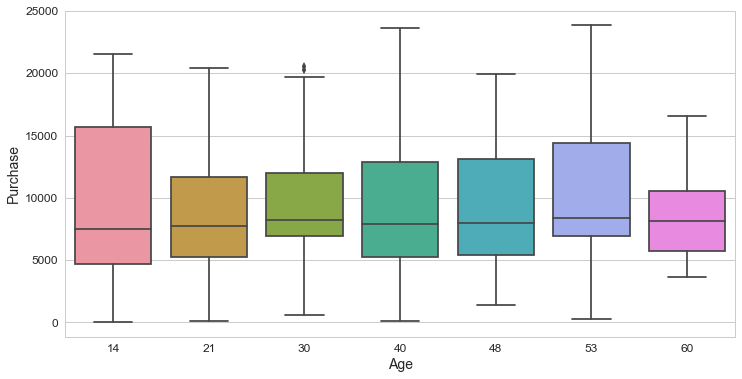

In [53]:
# Box Plot - Different Age Categories 
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Age', y = 'Purchase',  data = sample)

# Interesting Results - 
# Age group of 14 and 30 make Maximum purchase
# Age group 53 make expensive purchase.

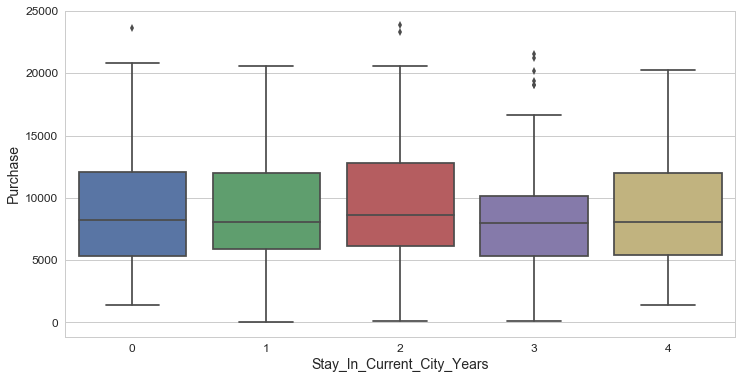

In [54]:
# Box Plot - Duration of stay in city
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Stay_In_Current_City_Years', y = 'Purchase',  data = sample)

# Interesting Results -
# People staying Longer in a place tend to make more expensive purchase

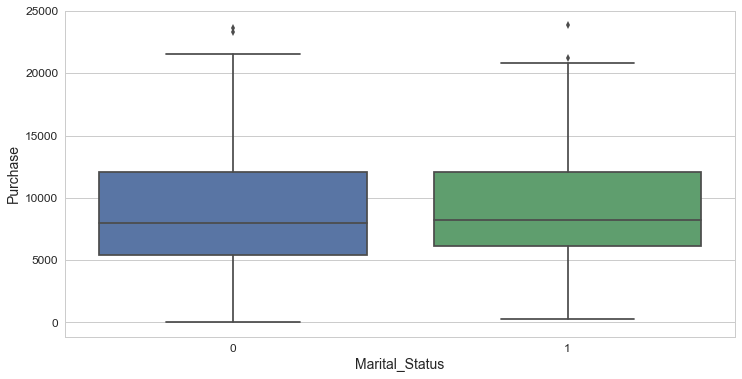

In [57]:
# Box Plot - Married vs Unmarried
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Marital_Status', y = 'Purchase',  data = sample)

# Interesting Results -
# Married users make more purchase than unmarried users.

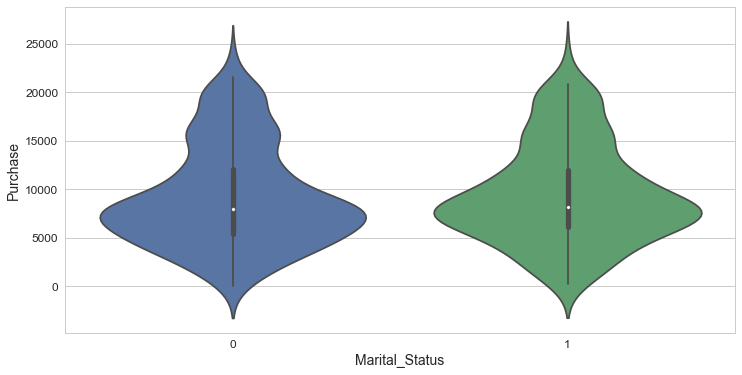

In [58]:
# Violin Plot 
plt.figure(figsize = (12, 6))
sns.violinplot(x="Marital_Status", y="Purchase", data=sample)

# Interesting Results - 
# Most of Single users purchase in range of 5000-1000
# Married users buy in a wider range

## Part IV. Building Regression Model

There are more than **3000** product_id hence I am not encoding the product id. Also, product_id is not a relevant feature and has been used to create new features. 

In [60]:
len(df_train['Product_ID'].unique()),len(df_train['Gender'].unique()), len(df_train['Occupation'].unique()),len(df_train['City_Category'].unique())

(3631, 2, 21, 3)

In [61]:
# drop from train
df_train=df_train.drop(['Product_ID'], axis=1)
# drop from test
df_test=df_test.drop(['Product_ID'], axis=1)

df_train.shape,df_test.shape

((550068, 12), (233599, 12))

In [62]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

### A. Label Encoding - Label Binarizer

Label encoding needed for following non-numeric attributes

- Product_ID
- Gender
- Occupation
- City_Category

In [63]:
def LabelEncoder(data=df_train):
    encoder = LabelBinarizer()
    sample_cat1 = data["City_Category"]
    cat1=encoder.fit_transform(sample_cat1)
    sample_cat2 = data["Gender"]
    cat2=encoder.fit_transform(sample_cat2)
    sample_cat3 = data["Occupation"]
    cat3=encoder.fit_transform(sample_cat3)
    temp=np.concatenate((cat1, cat2, cat3), axis=1)
    return temp

### B. Data Normalization - StandardScaler

In [68]:
def Standard_Scaler(data):
    # separating numeric data
    df_train_num = data.drop(["City_Category","Gender","Occupation"], axis=1)
    # Normalizing data
    scalar=preprocessing.StandardScaler().fit(df_train_num)
    return scalar.transform(df_train_num)

### C. Preparing Data for Model

In [69]:
# generate encoded stream for Non-Numeric Data
def prepare_data(data=df_train):
    # binary encoding of categorical data
    cat_data=LabelEncoder(data)
    # normalizing numeric data 
    num_data=Standard_Scaler(data)
    # concatinating two datasets 
    return pd.DataFrame(np.concatenate((num_data,cat_data), axis=1))

In [70]:
# Training Data
df_train_trans=prepare_data(df_train)
# this is a normalized data that has been added with additional features from Categorical data
df_train_trans.head(5)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.752639,-1.821202,0.109801,-0.833018,-0.610809,0.025639,0.044188,-1.036407,-0.615035,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.752639,-1.821202,0.109801,-0.833018,-1.118912,-0.924822,0.483374,-1.036407,0.359214,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.752639,-1.821202,0.109801,-0.833018,1.675656,0.025639,0.044188,-1.036407,-0.959050,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.752639,-1.821202,0.109801,-0.833018,1.675656,0.976099,0.044188,-1.036407,-0.301294,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.752061,2.324398,1.660861,-0.833018,0.659449,0.025639,0.044188,-0.796450,-0.681086,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# Training Data
df_test_trans=prepare_data(df_test)
df_test_trans.head(5)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,-1.752305,1.244130,0.110432,1.199419,-1.144571,0.260727,0.044081,-1.224029,1.320514,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.749409,-0.381063,-1.443264,-0.833737,-0.609292,-1.156481,0.044081,-0.878669,-0.479088,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.748830,0.521822,1.664128,1.199419,-0.074014,0.969330,0.044081,0.104279,-0.749028,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.748830,0.521822,1.664128,1.199419,-0.341653,-0.211676,0.044081,0.104279,-1.179647,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.748251,-0.381063,-0.666416,-0.833737,-0.341653,-1.156481,-0.394455,-0.705989,0.144346,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
# New data shape
df_train_trans.shape,df_test_trans.shape

((550068, 34), (233599, 34))

#### Model Creation

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Linear Regression Model - *Multivariate Regression*

In [79]:
def build_linear_regression():
    lin_reg = LinearRegression(fit_intercept=True, normalize=True,n_jobs=2)    
    # Training the model
    lin_reg.fit(df_train_trans, df_train_purchase)

    # testing with few training instances
    sample_data = df_train_trans.iloc[:5]
    sample_labels = df_train_purchase.iloc[:5]

    print("\nTest Logistic Regression Model:")
    print("Predictions:\t",list(lin_reg.predict(sample_data)))
    print("Labels:\t\t", list(sample_labels))
    
    predicted = lin_reg.predict(df_train_trans)
    return (lin_reg, predicted)

In [81]:
#model_LR,res=build_linear_regression()
#print(type(model_LR))

### Non-Linear Regression Model - *DecisionTree Regressor*

In [80]:
def build_decisiontree_regression():
    tree_reg = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=10, min_samples_split=2, min_samples_leaf=1)
    # Training the model
    tree_reg.fit(df_train_trans, df_train_purchase)

    # testing with few training instances
    sample_data = df_train_trans.iloc[:5]
    sample_labels = df_train_purchase.iloc[:5]
    
    print("\nTest Decision Tree Model:")
    print("Predictions:\t",list(tree_reg.predict(sample_data)))
    # testing with few training instances
    print("Labels:\t\t", list(sample_labels))
    
    predicted = tree_reg.predict(df_train_trans)
    return (tree_reg, predicted)

### Model Optimization - Gradient Boosting

In [89]:
def build_gradientboost_regression():
    #Fit model with best paramters then make predictions on the test set.
    gb_reg = GradientBoostingRegressor(learning_rate=0.1,max_depth=5,min_samples_leaf=8,max_features=0.88,n_estimators=300)
    
    # Training the model
    gb_reg.fit(df_train_trans, df_train_purchase)
    
    # testing with few training instances
    sample_data = df_train_trans.iloc[:5]
    sample_labels = df_train_purchase.iloc[:5]
    
    print("\nTest Gradient Boost Model:")
    print("Predictions:\t",list(gb_reg.predict(sample_data)))
    # testing with few training instances
    print("Labels:\t\t", list(sample_labels))
    
    predicted = gb_reg.predict(df_train_trans)
    return (gb_reg, predicted)

#### Build Model

In [78]:
def model_building():
    all_models=[]
    # creating logistic regression model
    df_train_trans_LR = build_linear_regression()
    all_models.append(df_train_trans_LR)
    # creating decision tree regression model
    df_train_trans_DT = build_decisiontree_regression()
    all_models.append(df_train_trans_DT)
    # creating logistic regression model
    df_train_trans_GB = build_gradientboost_regression()
    all_models.append(df_train_trans_GB)
    return all_models

In [90]:
# Build Model
all_models=model_building()
models=all_models


Test Logistic Regression Model:
Predictions:	 [8479.0, 10708.0, 4926.0, 5418.0, 8424.0]
Labels:		 [8370, 15200, 1422, 1057, 7969]

Test Decision Tree Model:
Predictions:	 [10358.6, 15149.005107003892, 1430.374185136897, 1430.374185136897, 7823.0897946186915]
Labels:		 [8370, 15200, 1422, 1057, 7969]

Test Gradient Boost Model:
Predictions:	 [11546.626044711547, 15648.28736132528, 1815.5472051526633, 1610.9884788087529, 7662.8440363017799]
Labels:		 [8370, 15200, 1422, 1057, 7969]


## Part V. Model Evaluation¶

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#### Using RMSE (Root Mean Squared Error)

In [84]:
def RMSE(actual, predicted):
    lin_mse = mean_squared_error(actual, predicted)
    lin_rmse = np.sqrt(lin_mse)
    return lin_rmse

#### Using MAE (Mean Absolute Error)

In [85]:
def MAE(actual, predicted):
    lin_mae = mean_absolute_error(actual, predicted)
    return lin_mae

In [87]:
def evaluate_model(actual, predicted,name):
    print("-"*40)
    print("Evaluating the model {0}".format(name))
    print("-"*40)
    rmse=RMSE(actual, predicted)
    print("\nRoot Mean Squared Error:\t",round(rmse,2))
    mae=MAE(actual, predicted)
    print("Mean Absolute Error:\t\t",round(mae,2))
    print("\n")
    return (rmse, mae)

### Evaluate

In [91]:
# evaluating the model
# 0: "Logistic Regression", 1: "Decision Tree", 2: "Gradient Boost"
evaluation=[]
for i in range(len(models)):
    model_cat={0: "Logistic Regression", 1: "Decision Tree", 2: "Gradient Boost"}
    evaluation.append(evaluate_model(df_train_purchase, models[i][1],model_cat[i]))

----------------------------------------
Evaluating the model Logistic Regression
----------------------------------------

Root Mean Squared Error:	 4532.67
Mean Absolute Error:		 3487.41


----------------------------------------
Evaluating the model Decision Tree
----------------------------------------

Root Mean Squared Error:	 2737.05
Mean Absolute Error:		 2041.92


----------------------------------------
Evaluating the model Gradient Boost
----------------------------------------

Root Mean Squared Error:	 2649.37
Mean Absolute Error:		 1973.25




## Part VI. Results

In the above model best accuracy has been achieved by Decision tree with Least MAE and RMSE among all three models - LR, GB, DT. 

**Note:** The accuracy of GB can be further improved by tuning some parameters - 
*learning_rate=0.5,max_depth=3,min_samples_leaf=8*. For example, max depth of Decision Tree is 10 wherseas for Gradient Boost its just 3. If the depth is increased along with reducing the learning rate , better results will be generated. The only cavaet is that this will make it computationally intense.

In [92]:
res_RMSE, res_MAE=[],[]
for r in evaluation:
    res_RMSE.append(round(r[0],2))
    res_MAE.append(round(r[1],2))
# Preparing Bar Chart to compare 
raw_data = {'Technique': ['LogisticRegression', 'DecisionTree', 'GradientBoost'],'RMSE': res_RMSE,'MAE': res_MAE}
df = pd.DataFrame(raw_data, columns = ['Technique', 'RMSE', 'MAE'])
# Evaluations on Training Data
df

,Technique,RMSE,MAE
0,LogisticRegression,4532.67,3487.41
1,DecisionTree,2737.05,2041.92
2,GradientBoost,2649.37,1973.25


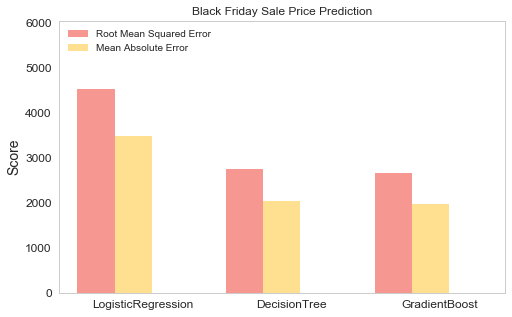

In [93]:
# Setting the positions and width for the bars
pos = list(range(len(df['Technique']))) 
width = 0.25 
# Plotting the bars
fig, ax = plt.subplots(figsize=(8,5))

# Create a bar for RMSE vs MAE,
# ref: https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html
plt.bar(pos, df['RMSE'], width,alpha=0.5, color='#EE3224',label=df['Technique'][0]) 
plt.bar([p + width for p in pos], df['MAE'], width, alpha=0.5, color='#FFC222', label=df['Technique'][2])

# Set the y axis label
ax.set_ylabel('Score')
# Set the chart's title
ax.set_title('Black Friday Sale Price Prediction')

# Set the position of the x ticks
ax.set_xticks([p + 1.25 * width for p in pos])
# Set the labels for the x ticks
ax.set_xticklabels(df['Technique'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*3)
plt.ylim([0, max(df['RMSE'] + 1500)] )

# Adding the legend and showing the plot
plt.legend(['Root Mean Squared Error', 'Mean Absolute Error'], loc='upper left')
plt.grid()
plt.show()

In [94]:
# Mean purchase price
print("Mean purchase price of an Item -",round(df_train_purchase.mean(),4))

Mean purchase price of an Item - 9263.9687


Considering that the average purchase price of an item is nearly **9264** the predicted prices are roughly within 80% price margin.  

### Predicting Purchase price on Test Data

In [95]:
# Test dataset - Transformed
df_test_trans.shape

(233599, 34)

In [107]:
def generate_predictions(model_repo):
    # previously built models
    model_type={0: "Logistic Regression", 1: "Decision Tree", 2: "Gradient Boost"}
    result_df={}
    
    for m in range(len(model_repo)):
        # testing with few training instances
        sample_data = df_test_trans.iloc[:5]
        model=model_repo[m][0]

        # testing with few training instances
        print("Testing {0} Model:".format(model_type[m]))
        print("Predictions:\t",list(model.predict(sample_data)))
        
        result = model.predict(df_test_trans)
        #retur
        result_df[model_type[m]]= list(result)
    return result_df

In [108]:
# generating predictions
result_df=generate_predictions(models)

Testing Logistic Regression Model:
Predictions:	 [12832.0, 10299.0, 7646.0, 7865.0, 9768.0]
Testing Decision Tree Model:
Predictions:	 [15836.491993373827, 9957.7953456536616, 6367.8918300054956, 2125.7727272727275, 2897.3010204081634]
Testing Gradient Boost Model:
Predictions:	 [16192.131962798878, 9641.7566499713939, 6862.1674554394149, 2884.3125725931995, 2999.8859309303471]


### Displaying Predicted Results

In [109]:
result_df['User_id']=df_test_copy.User_ID
result_df['Product_id']=df_test_copy.Product_ID
df_result = pd.DataFrame(result_df, columns = ['User_id','Product_id','Logistic Regression', 'Decision Tree', 'Gradient Boost'])
# resultant Dataframe
df_result.head(10)

,User_id,Product_id,Logistic Regression,Decision Tree,Gradient Boost
0,1000004,P00128942,12832.0,15836.491993,16192.131963
1,1000009,P00113442,10299.0,9957.795346,9641.756650
2,1000010,P00288442,7646.0,6367.891830,6862.167455
3,1000010,P00145342,7865.0,2125.772727,2884.312573
4,1000011,P00053842,9768.0,2897.301020,2999.885931
5,1000013,P00350442,10882.0,11052.486772,10424.620655
6,1000013,P00155442,11124.0,12530.371600,12368.773761
7,1000013,P0094542,10016.0,11052.486772,9396.741973
8,1000015,P00161842,6466.0,15479.330688,14791.330158
9,1000022,P00067942,8894.0,6255.423065,5741.565970
